In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [7]:
import cv2

In [8]:
def display(img):
    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.show()

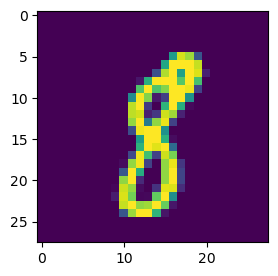

In [9]:
display(X_train[300])

### Convert labels to categorical (one-hot encode)

In [10]:
y_train 

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

### Build the CNN Model

In [13]:
model = Sequential()

# 1st Convolution Block
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

# 2nd Convolution Block
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# Flatten
model.add(Flatten())

# Dense Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10, activation='softmax'))

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [17]:
history = model.fit(
    X_train, y_train,
    
    validation_split=0.2,
    
    epochs=10,
    
    batch_size=32,
    
    callbacks=[early_stop]  # Add EarlyStopping here
)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7324 - loss: 0.7960 - val_accuracy: 0.9814 - val_loss: 0.0685
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9600 - loss: 0.1531 - val_accuracy: 0.9872 - val_loss: 0.0498
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9730 - loss: 0.1033 - val_accuracy: 0.9883 - val_loss: 0.0489
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9785 - loss: 0.0860 - val_accuracy: 0.9886 - val_loss: 0.0436
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9811 - loss: 0.0737 - val_accuracy: 0.9881 - val_loss: 0.0465
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9832 - loss: 0.0638 - val_accuracy: 0.9873 - val_loss: 0.0564
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9854 - loss: 0.0552 - val_accuracy: 0.9893 - val_loss: 0.0448
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 

In [18]:
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9881 - loss: 0.0466
Test Accuracy: 0.9907000064849854


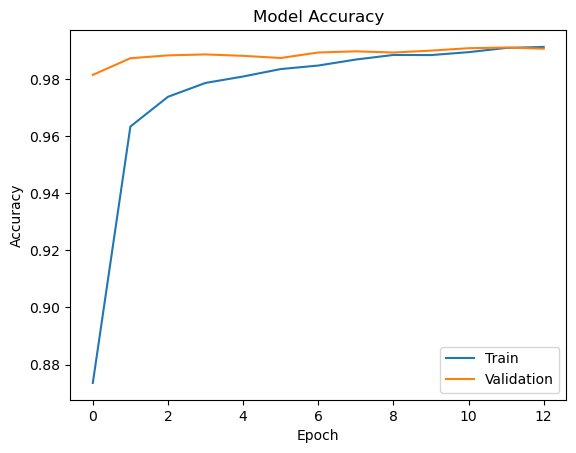

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.show()

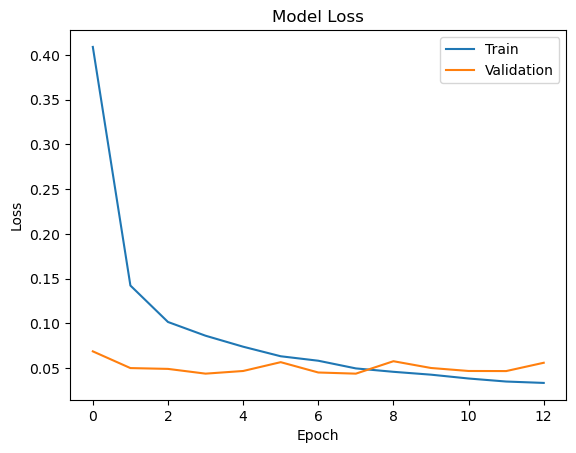

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.show()

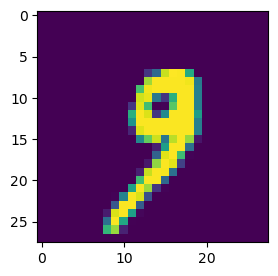

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Digit: 9


In [22]:
import numpy as np

index = 1000
# plt.imshow(, cmap='gray')
display(X_test[index].reshape(28,28))

pred = model.predict(X_test[index].reshape(1,28,28,1))

print("Predicted Digit:", np.argmax(pred))
